# StateModelRnD

There are two methods for using StateModelRnD, one is to install the python package on your computer and to write python scripts solve and interact with the solution. The other is to use the web interface. This notebook will focus on how to interact with StateModelRnD in a python script.

Before we begin we need to import a few libraries, including `StateModelRnD`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import StateModelRnD
from StateModelRnD import to_numpy
from IPython.display import display
import sympy
%matplotlib inline

Now that the required libraries have been imported we can start working on a problem. In this case we will be working on Example 5.3 of *System Dynamics: An Introduction* by Rowell and Wormley. This problem consists of mass with springs on either side, along with an input force and damping. A diagram of the physical system can be seen below,

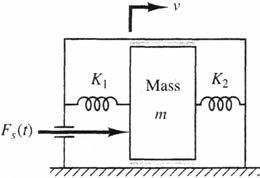

Following the procedure in Example 5.3 the following elemental equations are found,

$$\frac{dv_m}{dt}=\frac{1}{m}F_m$$
$$\frac{dF_K}{dt}=Kv_K$$
$$F_B=Bv_B$$

Of these equations the first two are state variables. The following continuity and compatability equations are also found,

$$F_m=F_s-F_B-F_K$$
$$v_K=v_m$$
$$v_B=V_m$$

These equations can be written in the following form.

In [2]:
InVars = 'Fs'
StVarElEqns = "vm' = Fm / m, Fk' = K * vk"
OtherElEqns = 'FB = B * vB'
Constraints = 'Fm = Fs - FB - Fk, vk = vm , vB = vm'
OutputVars = 'vm, Fk'

Now using the `StateModelRnD.find` command the solution can be found.

In [3]:
sys = StateModelRnD.Solve(InVars, StVarElEqns, OtherElEqns, Constraints, OutputVars)

Now that the solution has been found, different parts of the equation can be viewed including the $A$ matrix,

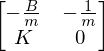

In [4]:
sys.A

the state equation,

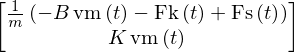

In [5]:
sys.StateEq

or the transfer function,

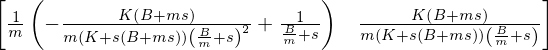

In [6]:
sys.TF

The results can also be viewed in other languages such as LaTeX,

In [7]:
print sympy.latex(sys.A)

\left[\begin{matrix}- \frac{B}{m} & - \frac{1}{m}\\K & 0\end{matrix}\right]


or Matlab,

In [8]:
print sympy.octave_code(sys.A)

[-B./m -1./m;
K     0]


Other `sympy` functions can also be used to manipulate the equations if desired. However at this point we will substitute in values for the constants to allow us to simulate the system. This process starts by defining the values for each constant.

In [9]:
Values = {
    'm': 0.5,
    'K': 10,
    'B': 0.01
}

Now the state equation matricies can be converted to `numpy` matricies.

In [10]:
A = to_numpy.matrix(sys.A, Values)
B = to_numpy.matrix(sys.B, Values)
C = to_numpy.matrix(sys.C, Values)
D = to_numpy.matrix(sys.D, Values)

A Forward Euler method can now be used to simulate the system given the initial condition `x0`.

In [11]:
dt = 0.001
x0 = np.matrix([[0.1], [0]])
tf = 5
Fs = np.matrix([[0.2]])

x = np.matrix(np.ndarray((A.shape[0], int(tf/dt) + 1)))
y = np.matrix(np.ndarray((C.shape[0], int(tf/dt) + 1)))

x[:,0] = x0
y[:,0] = C * x0 + D * Fs
for i in range(int(tf/dt)):
    x[:,i+1] = x[:,i] + dt * (A * x[:,i] + B * Fs)
    y[:,i+1] = C * x[:,i+1] + D * Fs

This data can now be plotted to view the system's time response.

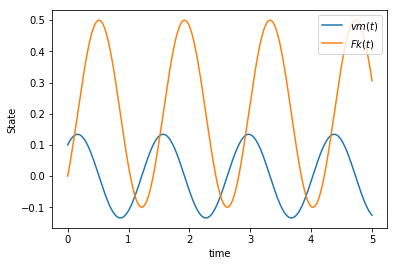

In [12]:
plt.plot(np.arange(0, tf + dt, dt), y.T.A)
plt.xlabel('time')
plt.ylabel('State')
plt.legend(['$vm(t)$', '$Fk(t)$'], loc = 'upper right')